In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
N_EPOCH = 100

In [116]:
history_atis = pd.read_csv('history/intent_and_slot_atis.csv')
history_snips = pd.read_csv('history/intent_and_slot_snips.csv')

In [117]:
tmp_snips = history_snips[history_snips['epoch'] == N_EPOCH].drop(columns=['epoch']).copy()

tmp_snips['score_type'] = tmp_snips['model'].apply(lambda x: x.rsplit('_', 1)[-1])
tmp_snips['alpha'] = tmp_snips['model'].apply(lambda x: x.split('_')[0])

tmp_snips = (
    tmp_snips
    .drop(columns=['model'])
    .pivot(index=['alpha'], columns='score_type')
    .reset_index()
)

tmp_snips['dataset'] = 'SNIPS'

In [127]:
tmp_atis = history_atis[history_atis['epoch'] == N_EPOCH].drop(columns=['epoch']).copy()

tmp_atis['score_type'] = tmp_atis['model'].apply(lambda x: x.rsplit('_', 1)[-1])
tmp_atis['alpha'] = tmp_atis['model'].apply(lambda x: x.split('_')[0])

tmp_atis = (
    tmp_atis
    .drop(columns=['model'])
    .pivot(index=['alpha'], columns='score_type')
    .reset_index()
)

tmp_atis['dataset'] = 'ATIS'

In [119]:
tmp = pd.concat([tmp_snips, tmp_atis])

In [ ]:
tmp.groupBy('')

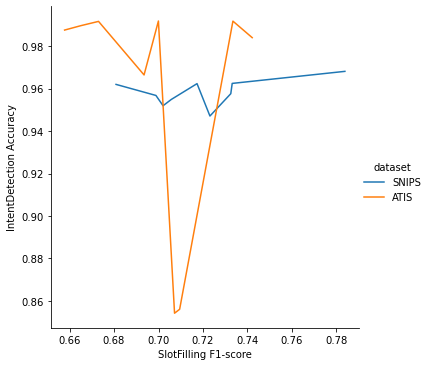

In [41]:
sns.relplot(data=tmp, x=('test_f1', 'slot'), y=('test_acc', 'intent'), hue='dataset', kind='line')
plt.xlabel('SlotFilling F1-score')
plt.ylabel('IntentDetection Accuracy')
plt.savefig('plots/intent_and_slot_acc.pdf', bbox_inches='tight')

In [120]:
tmp_snips = history_snips[history_snips['epoch'] == N_EPOCH].drop(columns=['epoch']).copy()

tmp_snips['score_type'] = tmp_snips['model'].apply(lambda x: x.rsplit('_', 1)[-1])
tmp_snips['alpha'] = tmp_snips['model'].apply(lambda x: float(x.split('_')[0].split('=')[1]))

tmp_snips['Score'] = np.where(tmp_snips['score_type'] == 'intent', tmp_snips['test_acc'], tmp_snips['test_f1'])

In [133]:
tmp_atis.sort_values('test_f1', ascending=False)

,model,train_loss,train_acc,train_f1,test_loss,test_acc,test_f1,score_type,alpha,Score
1793,alpha=0.68_slot,0.004263,0.999091,0.760122,0.237713,0.961868,0.742157,slot,0.68,0.742157
1788,alpha=0.32_intent,0.001449,0.999719,0.984314,0.063193,0.991725,0.741091,intent,0.32,0.991725
1784,alpha=0.10_intent,0.000027,1.000000,1.000000,0.055049,0.991905,0.739532,intent,0.10,0.991905
1787,alpha=0.18_slot,0.007943,0.997955,0.762358,0.279012,0.960533,0.733477,slot,0.18,0.733477
1795,alpha=0.82_slot,0.003403,0.999240,0.771534,0.217917,0.963137,0.709505,slot,0.82,0.709505
1799,alpha=0.95_slot,0.003041,0.999627,0.764193,0.252237,0.959836,0.707213,slot,0.95,0.707213
1785,alpha=0.10_slot,0.008771,0.997492,0.785221,0.235591,0.960796,0.699957,slot,0.10,0.699957
1797,alpha=0.90_slot,0.003490,0.999198,0.769807,0.238868,0.962147,0.693493,slot,0.90,0.693493
1786,alpha=0.18_intent,0.001755,0.999821,0.989544,0.077415,0.991848,0.691029,intent,0.18,0.991848
1782,alpha=0.05_intent,0.009739,0.997150,0.891154,0.062702,0.987635,0.684207,intent,0.05,0.987635


In [134]:
tmp_atis.sort_values('test_acc', ascending=False)

,model,train_loss,train_acc,train_f1,test_loss,test_acc,test_f1,score_type,alpha,Score
1784,alpha=0.10_intent,0.000027,1.000000,1.000000,0.055049,0.991905,0.739532,intent,0.10,0.991905
1786,alpha=0.18_intent,0.001755,0.999821,0.989544,0.077415,0.991848,0.691029,intent,0.18,0.991848
1788,alpha=0.32_intent,0.001449,0.999719,0.984314,0.063193,0.991725,0.741091,intent,0.32,0.991725
1790,alpha=0.50_intent,0.036646,0.999322,0.916181,0.165822,0.989709,0.615005,intent,0.50,0.989709
1782,alpha=0.05_intent,0.009739,0.997150,0.891154,0.062702,0.987635,0.684207,intent,0.05,0.987635
1792,alpha=0.68_intent,0.903268,0.989880,0.398693,1.068303,0.984057,0.374422,intent,0.68,0.984057
1796,alpha=0.90_intent,3.027834,0.969397,0.331171,3.207564,0.966481,0.314064,intent,0.90,0.966481
1791,alpha=0.50_slot,0.007026,0.997934,0.710667,0.235533,0.963363,0.665062,slot,0.50,0.665062
1795,alpha=0.82_slot,0.003403,0.999240,0.771534,0.217917,0.963137,0.709505,slot,0.82,0.709505
1797,alpha=0.90_slot,0.003490,0.999198,0.769807,0.238868,0.962147,0.693493,slot,0.90,0.693493


In [ ]:
tmp_snips[tmp_snips['score_type'] == 'intent'].sort_values('test_f1')

In [129]:
tmp_atis = history_atis[history_atis['epoch'] == N_EPOCH].drop(columns=['epoch']).copy()

tmp_atis['score_type'] = tmp_atis['model'].apply(lambda x: x.rsplit('_', 1)[-1])
tmp_atis['alpha'] = tmp_atis['model'].apply(lambda x: float(x.split('_')[0].split('=')[1]))

tmp_atis['Score'] = np.where(tmp_atis['score_type'] == 'intent', tmp_atis['test_acc'], tmp_atis['test_f1'])

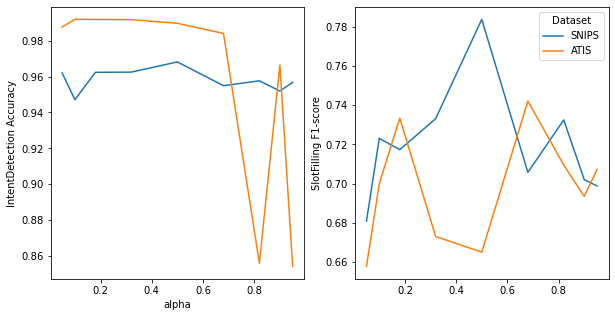

In [33]:
fix, axis = plt.subplots(ncols=2, figsize=(10, 5))

p = tmp_snips[tmp_snips['score_type'] == 'intent']
axis[0].plot(p['alpha'], p['test_acc'], label='SNIPS')

p = tmp_snips[tmp_snips['score_type'] == 'slot']
axis[1].plot(p['alpha'], p['test_f1'], label='SNIPS')

p = tmp_atis[tmp_atis['score_type'] == 'intent']
axis[0].plot(p['alpha'], p['test_acc'], label='ATIS')

p = tmp_atis[tmp_atis['score_type'] == 'slot']
axis[1].plot(p['alpha'], p['test_f1'], label='ATIS')

axis[0].set_ylabel('IntentDetection Accuracy')
axis[1].set_ylabel('SlotFilling F1-score')

axis[0].set_xlabel('alpha')
axis[0].set_xlabel('alpha')

plt.legend(title='Dataset')

plt.savefig('plots/int_slot_alpha.pdf', bbox_inches='tight')

# Info

In [135]:
history_atis = pd.read_csv('history/additional_info_atis.csv')
history_snips = pd.read_csv('history/additional_info_snips.csv')

In [136]:
tmp_snips = history_snips.copy()

tmp_snips_train = (
    tmp_snips[['epoch', 'model', 'train_loss', 'train_acc', 'train_f1']]
    .rename(columns={'train_loss': 'loss', 'train_acc': 'acc', 'train_f1': 'f1'})
)
tmp_snips_train['dataset'] = 'train'

tmp_snips_test = (
    tmp_snips[['epoch', 'model', 'test_loss', 'test_acc', 'test_f1']]
    .rename(columns={'test_loss': 'loss', 'test_acc': 'acc', 'test_f1': 'f1'})
)
tmp_snips_test['dataset'] = 'test'

tmp_snips = pd.concat([tmp_snips_train, tmp_snips_test])
tmp_snips['target'] = tmp_snips['model'].apply(lambda x: x.split('_', 1)[0])
tmp_snips['with_info'] = tmp_snips['model'].apply(lambda x: x.split('_')[1] == 'with')

tmp_snips.head()

,epoch,model,loss,acc,f1,dataset,target,with_info
0,1,slot_without_intent_info,2.691966,0.430154,0.083980,train,slot,False
1,1,slot_with_intent_info,2.503057,0.442386,0.086005,train,slot,True
2,1,intent_without_slot_info,1.148964,0.743754,0.723715,train,intent,False
3,1,intent_with_slot_info,1.147155,0.742016,0.724858,train,intent,True
4,2,slot_without_intent_info,1.896361,0.538479,0.114655,train,slot,False


In [137]:
tmp_atis = history_atis.copy()

tmp_atis_train = (
    tmp_atis[['epoch', 'model', 'train_loss', 'train_acc', 'train_f1']]
    .rename(columns={'train_loss': 'loss', 'train_acc': 'acc', 'train_f1': 'f1'})
)
tmp_atis_train['dataset'] = 'train'

tmp_atis_test = (
    tmp_atis[['epoch', 'model', 'test_loss', 'test_acc', 'test_f1']]
    .rename(columns={'test_loss': 'loss', 'test_acc': 'acc', 'test_f1': 'f1'})
)
tmp_atis_test['dataset'] = 'test'

tmp_atis = pd.concat([tmp_atis_train, tmp_atis_test])
tmp_atis['target'] = tmp_atis['model'].apply(lambda x: x.split('_', 1)[0])
tmp_atis['with_info'] = tmp_atis['model'].apply(lambda x: x.split('_')[1] == 'with')


tmp_atis.head()

,epoch,model,loss,acc,f1,dataset,target,with_info
0,1,slot_without_intent_info,2.133666,0.591742,0.325227,train,slot,False
1,1,slot_with_intent_info,2.138026,0.594365,0.327507,train,slot,True
2,1,intent_without_slot_info,0.355693,0.906766,0.304985,train,intent,False
3,1,intent_with_slot_info,0.407608,0.892469,0.304816,train,intent,True
4,2,slot_without_intent_info,1.732180,0.629866,0.350778,train,slot,False


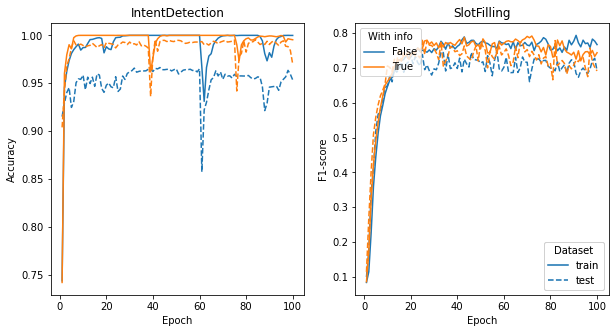

In [114]:
fig, axis = plt.subplots(ncols=2, figsize=(10, 5))

p = tmp_snips[tmp_snips['target'] == 'intent']
t = p[(~p['with_info']) & (p['dataset'] == 'train')]
line = axis[0].plot(t['epoch'], t['acc'], '-')
t = p[(~p['with_info']) & (p['dataset'] == 'test')]
line = axis[0].plot(t['epoch'], t['acc'], '--', c=line[0].get_color())

t = p[(p['with_info']) & (p['dataset'] == 'train')]
line = axis[0].plot(t['epoch'], t['acc'], '-')
t = p[(p['with_info']) & (p['dataset'] == 'test')]
line = axis[0].plot(t['epoch'], t['acc'], '--', c=line[0].get_color())

p = tmp_snips[tmp_snips['target'] == 'slot']
t = p[(~p['with_info']) & (p['dataset'] == 'train')]
line = axis[1].plot(t['epoch'], t['f1'], '-')
t = p[(~p['with_info']) & (p['dataset'] == 'test')]
line = axis[1].plot(t['epoch'], t['f1'], '--', c=line[0].get_color())

t = p[(p['with_info']) & (p['dataset'] == 'train')]
line = axis[1].plot(t['epoch'], t['f1'], '-')
t = p[(p['with_info']) & (p['dataset'] == 'test')]
line = axis[1].plot(t['epoch'], t['f1'], '--', c=line[0].get_color())

lines = axis[0].get_lines()
legend1 = plt.legend([lines[0], lines[2]], [False, True], loc=2, title='With info')
fig.add_artist(legend1)
legend2 = plt.legend([lines[0], lines[1]], ['train', 'test'], loc=4, title='Dataset')
fig.add_artist(legend2)

axis[0].set_ylabel('Accuracy')
axis[1].set_ylabel('F1-score')

axis[0].set_xlabel('Epoch')
axis[1].set_xlabel('Epoch')

axis[0].set_title('IntentDetection')
axis[1].set_title('SlotFilling')

plt.savefig('plots/additional_info_snips.pdf', bbox_inches='tight')

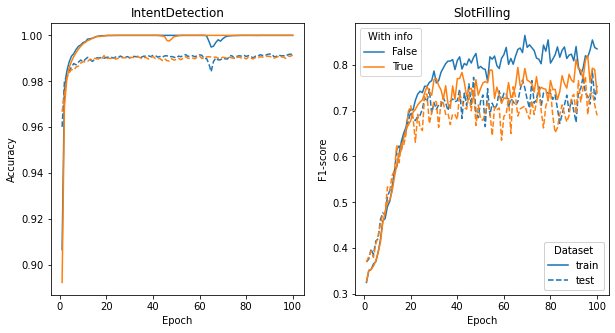

In [115]:
fig, axis = plt.subplots(ncols=2, figsize=(10, 5))

p = tmp_atis[tmp_atis['target'] == 'intent']
t = p[(~p['with_info']) & (p['dataset'] == 'train')]
line = axis[0].plot(t['epoch'], t['acc'], '-')
t = p[(~p['with_info']) & (p['dataset'] == 'test')]
line = axis[0].plot(t['epoch'], t['acc'], '--', c=line[0].get_color())

t = p[(p['with_info']) & (p['dataset'] == 'train')]
line = axis[0].plot(t['epoch'], t['acc'], '-')
t = p[(p['with_info']) & (p['dataset'] == 'test')]
line = axis[0].plot(t['epoch'], t['acc'], '--', c=line[0].get_color())

p = tmp_atis[tmp_atis['target'] == 'slot']
t = p[(~p['with_info']) & (p['dataset'] == 'train')]
line = axis[1].plot(t['epoch'], t['f1'], '-')
t = p[(~p['with_info']) & (p['dataset'] == 'test')]
line = axis[1].plot(t['epoch'], t['f1'], '--', c=line[0].get_color())

t = p[(p['with_info']) & (p['dataset'] == 'train')]
line = axis[1].plot(t['epoch'], t['f1'], '-')
t = p[(p['with_info']) & (p['dataset'] == 'test')]
line = axis[1].plot(t['epoch'], t['f1'], '--', c=line[0].get_color())

lines = axis[0].get_lines()
legend1 = plt.legend([lines[0], lines[2]], [False, True], loc=2, title='With info')
fig.add_artist(legend1)
legend2 = plt.legend([lines[0], lines[1]], ['train', 'test'], loc=4, title='Dataset')
fig.add_artist(legend2)

axis[0].set_ylabel('Accuracy')
axis[1].set_ylabel('F1-score')

axis[0].set_xlabel('Epoch')
axis[1].set_xlabel('Epoch')

axis[0].set_title('IntentDetection')
axis[1].set_title('SlotFilling')

plt.savefig('plots/additional_info_atis.pdf', bbox_inches='tight')

In [145]:
tmp = tmp_snips[(tmp_snips['epoch'] == N_EPOCH) & (tmp_snips['dataset'] == 'test')].copy()
tmp['score'] = np.where(tmp['target'] == 'slot', tmp['f1'], tmp['acc'])

tmp = (
    tmp
    [['with_info', 'score', 'target']]
    .pivot(index=['with_info'], columns='target')
    .reset_index()
)

tmp

with_info     score          
target              intent      slot
0          False  0.953513  0.692220
1           True  0.970080  0.691749

In [146]:
tmp = tmp_atis[(tmp_atis['epoch'] == N_EPOCH) & (tmp_atis['dataset'] == 'test')].copy()
tmp['score'] = np.where(tmp['target'] == 'slot', tmp['f1'], tmp['acc'])

tmp = (
    tmp
    [['with_info', 'score', 'target']]
    .pivot(index=['with_info'], columns='target')
    .reset_index()
)

tmp

with_info     score          
target              intent      slot
0          False  0.991804  0.754116
1           True  0.991399  0.689628

In [147]:
history_atis = pd.read_csv('history/new_model_atis.csv')
history_snips = pd.read_csv('history/new_model_snips.csv')

In [148]:
tmp_snips = history_snips[history_snips['epoch'] == N_EPOCH].copy()
tmp_snips['alpha'] = tmp_snips['model'].apply(lambda x: x.split('_', 1)[0])
tmp_snips['model'] = tmp_snips['model'].apply(lambda x: x.split('_', 1)[1])
tmp_snips = (
    tmp_snips
    .drop(columns=['epoch'])
    .pivot(index='alpha', columns='model')
)
tmp_snips['dataset'] = 'SNIPS'

In [149]:
tmp_atis = history_atis[history_atis['epoch'] == N_EPOCH].copy()
tmp_atis['alpha'] = tmp_atis['model'].apply(lambda x: x.split('_', 1)[0])
tmp_atis['model'] = tmp_atis['model'].apply(lambda x: x.split('_', 1)[1])
tmp_atis = (
    tmp_atis
    .drop(columns=['epoch'])
    .pivot(index='alpha', columns='model')
)
tmp_atis['dataset'] = 'atis'

In [150]:
tmp = pd.concat([tmp_snips, tmp_atis])

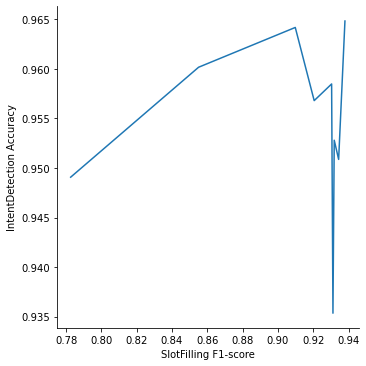

In [159]:
sns.relplot(data=tmp_snips, x=('test_f1', 'slot'), y=('test_acc', 'intent'), kind='line')
plt.xlabel('SlotFilling F1-score')
plt.ylabel('IntentDetection Accuracy')
plt.savefig('plots/new_model_snips.pdf', bbox_inches='tight')

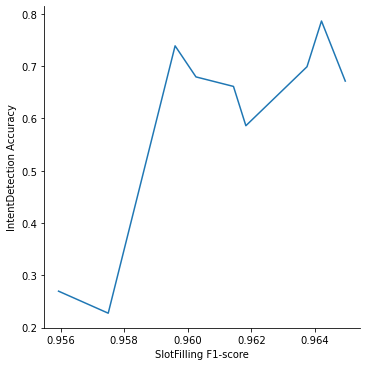

In [160]:
sns.relplot(data=tmp_atis, x=('test_f1', 'slot'), y=('test_acc', 'intent'), kind='line')
plt.xlabel('SlotFilling F1-score')
plt.ylabel('IntentDetection Accuracy')
plt.savefig('plots/new_model_atis.pdf', bbox_inches='tight')

In [165]:
tmp_atis.sort_values(('test_f1', 'slot'), ascending=False)

train_loss           train_acc            train_f1            \
model          intent      slot    intent      slot    intent      slot   
alpha                                                                     
alpha=0.32   0.000228  0.004284  0.998893  0.789671  0.999962  0.999327   
alpha=0.18   0.000164  0.011356  1.000000  0.861367  1.000000  0.997502   
alpha=0.68   0.001583  0.005349  0.983631  0.824444  0.999578  0.998874   
alpha=0.95   0.066709  0.002474  0.712138  0.656037  0.994031  0.999589   
alpha=0.5    0.000879  0.006841  0.979080  0.710403  0.999757  0.998430   
alpha=0.9    0.006142  0.003382  0.892962  0.707715  0.998007  0.999347   
alpha=0.82   0.005594  0.008837  0.889783  0.727899  0.998070  0.997821   
alpha=0.05  10.729645  0.046609  0.303874  0.805059  0.892704  0.987877   
alpha=0.1    3.053387  0.034917  0.344259  0.619188  0.969463  0.992083   

            test_loss            test_acc             test_f1            \
model          intent      slot    intent      slot    intent      slot   
alpha                                                                     
alpha=0.32   0.073661  0.211298  0.671276  0.722339  0.990619  0.964956   
alpha=0.18   0.046063  0.210099  0.786099  0.813684  0.992606  0.964208   
alpha=0.68   0.053112  0.212311  0.698704  0.743890  0.991213  0.963752   
alpha=0.95   0.246294  0.235455  0.585987  0.618741  0.986429  0.961829   
alpha=0.5    0.057932  0.229853  0.661111  0.708258  0.991678  0.961439   
alpha=0.9    0.066055  0.231835  0.679272  0.700252  0.990529  0.960259   
alpha=0.82   0.050593  0.238527  0.738622  0.684336  0.991268  0.959602   
alpha=0.05  11.078355  0.210303  0.227708  0.767984  0.889216  0.957498   
alpha=0.1    3.369991  0.205671  0.269812  0.653462  0.966300  0.955935   

           dataset  
model               
alpha               
alpha=0.32    atis  
alpha=0.18    atis  
alpha=0.68    atis  
alpha=0.95    atis  
alpha=0.5     atis  
alpha=0.9     atis  
alpha=0.82    atis  
alpha=0.05    atis  
alpha=0.1     atis